# Methods at Manchester Session 1 Part A

This file provides code for the first half of the workshop on Topological Data Analysis Ball Mapper (TDABM) held at the University of Manchester on the 18th November 2025. The code in this file provides replication in Python. There is no corresponding R code for this section as it is simply generating the example plots in the talk.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import random
import networkx as nx
import sklearn
import statistics
import pyballmapper as pbm


To help with the generation of artificial data, a new function is defined. The function has a number of datapoints, n, a number of variables, d, and a covariance matrix input. The output is then a set of random normal variables that have the prescribed covariance structure.

In [2]:
def gen_random(n: int, d: int, covar: float) -> np.ndarray:
    cov_mat = np.ones((d, d)) * covar; np.fill_diagonal(cov_mat, 1)
    offset = np.zeros(d)

    return np.random.multivariate_normal(offset, cov_mat, size=n)

We generate two artificial bivariate datasets here. One is standard normal, whilst the second is uniform on [0,1]

In [3]:
rng = np.random.default_rng(seed=1234)
x1a = rng.normal(size=100)
x2a = rng.normal(size=100)
xa = pd.DataFrame(x1a,x2a)

x1b = np.random.uniform(0,1,100)
x2b = np.random.uniform(0,1,100)
xb = pd.DataFrame(x1b,x2b)

A scatter plot of the normally distributed variable is constructed, displaying the expected form for a Gaussian cloud

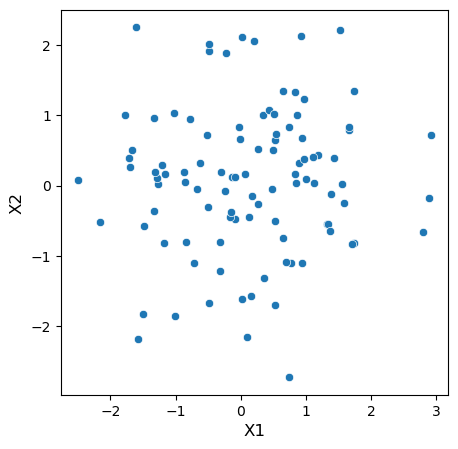

In [4]:
fig, ax = plt.subplots(figsize = ( 5 , 5 )) 
  
# Plot the scatterplot 
sb.scatterplot( ax = ax , x = x1a , y = x2a , data = xa ) 
  
# Set label for x-axis 
ax.set_xlabel( "X1" , size = 12 ) 
  
# Set label for y-axis 
ax.set_ylabel( "X2" , size = 12 ) 
  
# Display figure 
plt.show() 

Another scatter plot is generated for the uniform case, xb

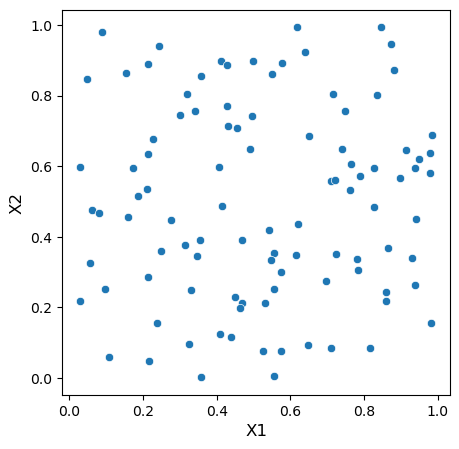

In [5]:
fig, ax = plt.subplots(figsize = ( 5 , 5 )) 
sb.scatterplot( ax = ax , x = x1b , y = x2b , data = xb ) 

ax.set_xlabel( "X1" , size = 12 ) 
ax.set_ylabel( "X2" , size = 12 ) 
 
plt.show()

A further three random datasets are generated. These datasets will be explained more when we come to look at the structure of data. However, it should be apparent that the additional datasets are also Gaussian bivariate datasets based upon the standard normal distribution

In [6]:
rng = np.random.default_rng(seed=6789)
x1c = rng.normal(size=100)
x2c = rng.normal(size=100)
xc = pd.DataFrame(x1c,x2c)

rng = np.random.default_rng(seed=9876)
x1d = rng.normal(size=100)
x2d = rng.normal(size=100)
xd = pd.DataFrame(x1d,x2d)

rng = np.random.default_rng(seed=4321)
x1e = rng.normal(size=1000)
x2e = rng.normal(size=1000)
xe = pd.DataFrame(x1e,x2e)

To see that there will be variation between the scatterplots we can plot dataset xc. Although the appearance is different, the plots do share many similarities. For comparability we set the axes to (-4,4). It is necessary to plt dataset xa first as the reference case in the comparison with xc

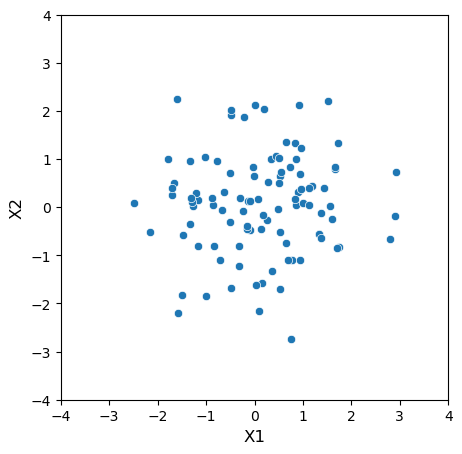

In [7]:
fig, ax = plt.subplots(figsize = ( 5 , 5 )) 
sb.scatterplot( ax = ax , x = x1a , y = x2a , data = xa ) 

ax.set_xlabel( "X1" , size = 12 ) 
ax.set_ylabel( "X2" , size = 12 ) 

ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
 
plt.show()

Next the xc plot for comparison

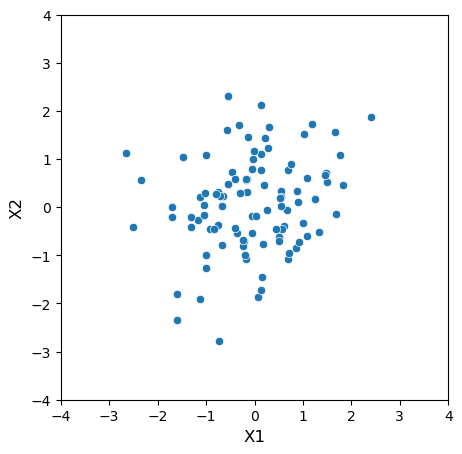

In [8]:
fig, ax = plt.subplots(figsize = ( 5 , 5 )) 
sb.scatterplot( ax = ax , x = x1c , y = x2c , data = xc ) 

ax.set_xlabel( "X1" , size = 12 ) 
ax.set_ylabel( "X2" , size = 12 ) 

ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
 
plt.show()

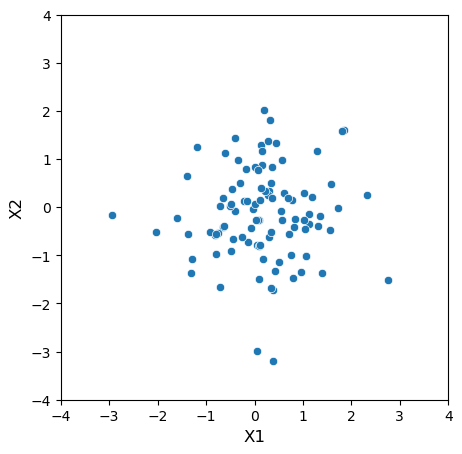

In [9]:
fig, ax = plt.subplots(figsize = ( 5 , 5 )) 
sb.scatterplot( ax = ax , x = x1d , y = x2d , data = xd ) 

ax.set_xlabel( "X1" , size = 12 ) 
ax.set_ylabel( "X2" , size = 12 ) 

ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
 
plt.show()

The final dataset is xe. This dataset has a lot more data points, but as can be confirmed from the generation code does have the same distribution as the initial Gaussian cloud of 100 points

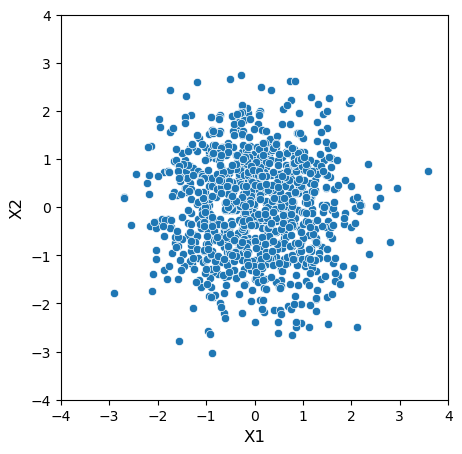

In [10]:
fig, ax = plt.subplots(figsize = ( 5 , 5 )) 
sb.scatterplot( ax = ax , x = x1e , y = x2e , data = xe ) 

ax.set_xlabel( "X1" , size = 12 ) 
ax.set_ylabel( "X2" , size = 12 ) 

ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
 
plt.show()

## Considering Correlation

So far there have been no relationships between the two variables. However, one of the reasons to view data is to consider the relationships between variables. Consequently, we develop a function that will allow the inclusion of correlation amongst the random data points. The new function is defined in the following lines of code

Notice that we are converting the correlation matrix into a covariance matrix. By converting we are then able to supply a covariance matrix to the function that was defined at the start of this file.

In [11]:
def corr2cov(p: np.ndarray, s: np.ndarray) -> np.ndarray:
    """Covariance matrix from correlation & standard deviations"""
    d = np.diag(s)
    return d @ p @ d

As an example, construct a pair of variables with a correlation of -0.9

In [12]:
# Start with a correlation matrix and standard deviations.
# -0.90 is the correlation between A and B, and the correlation
# of a variable with itself is 1.0.
corr = np.array([[1., -0.90],
                  [-0.90, 1.]])

# Standard deviations/means of A and B, respectively
stdev = np.array([1., 1.])
mean = np.array([0,0])
cov = corr2cov(corr, stdev)

# `size` is the number of observations we will include
# (500 months, days, and so on).
xfm09 = np.random.multivariate_normal(mean=mean, cov=cov, size=500)
xfm09 = pd.DataFrame(xfm09)
xfm09.columns = ['X1','X2']

This dataset can be plotted to reveal the correlation structure

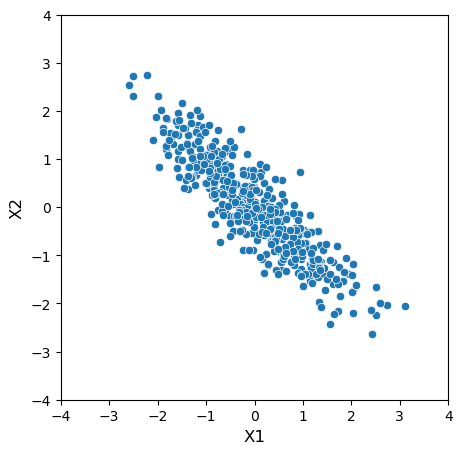

In [13]:
fig, ax = plt.subplots(figsize = ( 5 , 5 )) 
sb.scatterplot( ax = ax , x = 'X1' , y = 'X2' , data = xfm09 ) 

ax.set_xlabel( "X1" , size = 12 ) 
ax.set_ylabel( "X2" , size = 12 ) 

ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
 
plt.show()

To see any other correlation value then simply edit the code to include the correlation value you would like. The scatterplot can then be generated again using the second block of code.

## Introducing Dummy Variables

Scatterplots also allow us to work with colours. The first step is to introduce a dummy variable that highlights a subset of the observations. Here we use some simple rules on X1 and X2 to generate the dummies

In [14]:
corr = np.array([[1., 0.30],
                  [0.30, 1.]])

cov = corr2cov(corr, stdev)

xfp03 = np.random.multivariate_normal(mean=mean, cov=cov, size=500)
xfp03 = pd.DataFrame(xfp03)
xfp03.columns = ['X1','X2']

xfp03['dummy1'] = ((xfp03['X1']>=1) & (xfp03['X1']<2) & (xfp03['X2']>=1) & (xfp03['X2']<2))*1
xfp03['dummy2'] = ((xfp03['X1']>=-2) & (xfp03['X1']<-1) & (xfp03['X2']>=-2) & (xfp03['X2']<-1))*1

The scatter plot may then be constructed. There are two versions in the codes that follow. One with just the dummy1 values highlighted and one with both dummies shown

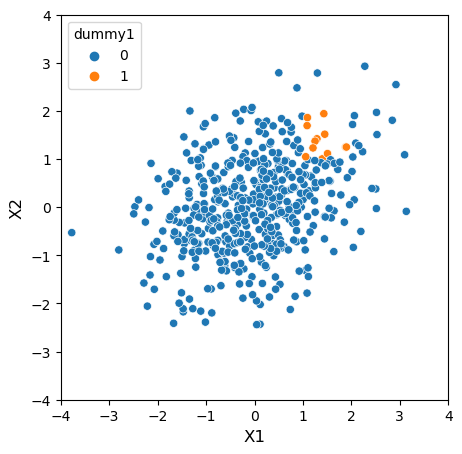

In [15]:
fig, ax = plt.subplots(figsize = ( 5 , 5 )) 
sb.scatterplot( ax = ax , x = 'X1' , y = 'X2' , data = xfp03 , hue="dummy1") 

ax.set_xlabel( "X1" , size = 12 ) 
ax.set_ylabel( "X2" , size = 12 ) 

ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
 
plt.show()

Adding the second dummy

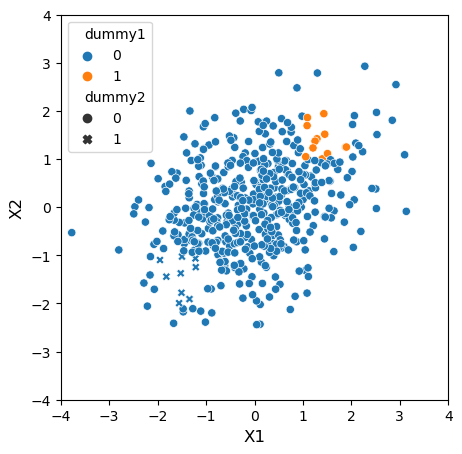

In [16]:
fig, ax = plt.subplots(figsize = ( 5 , 5 )) 
sb.scatterplot( ax = ax , x = 'X1' , y = 'X2' , data = xfp03 , hue="dummy1",style="dummy2") 

ax.set_xlabel( "X1" , size = 12 ) 
ax.set_ylabel( "X2" , size = 12 ) 

ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
 
plt.show()

# Ball Mapper

We now turn to the TDABM section of the talk. For the TDABM section, there are further artificial datasets used. Another random generation function is created here.

In [17]:
def gen_random(n: int, d: int, covar: float, seed: int = 42) -> np.ndarray:
    ## new code should use 
    ## https://numpy.org/doc/stable/reference/random/generator.html
    rng = np.random.default_rng(seed=seed)

    cov_mat = np.ones((d, d)) * covar; np.fill_diagonal(cov_mat, 1)
    offset = np.zeros(d)

    return rng.multivariate_normal(offset, cov_mat)

We then generate some artificial data

In [18]:
rng = np.random.default_rng(seed=1234)
x1a = rng.normal(size=400)
x2a = rng.normal(size=400)
xa = pd.DataFrame(x1a,x2a)
xa['X1'] = xa.index
xa.columns = ['X2','X1']
xa.reset_index(inplace=True, drop=True)

x1b = rng.uniform(0,1,400)
x2b = rng.uniform(0,1,400)
xb = pd.DataFrame(x1b,x2b)
xb['X1'] = xb.index
xb.columns = ['X2','X1']
xb.reset_index(inplace=True, drop=True)

There will be two datasets which have four distinct sub-clouds within the overall cloud:

In [19]:
rng = np.random.default_rng(seed=1234)

corr = np.array([[1., 0.00],
                  [0.00, 1.]])

stdev = np.array([1., 1.])
mean = np.array([0,0])

cov = corr2cov(corr, stdev)

xfp0 = rng.multivariate_normal(mean=mean, cov=cov, size=100)
xfp0 = pd.DataFrame(xfp0)
xfp0.columns = ['X1','X2']

# Update so second cluster is centered on 0 8

mean = np.array([0,8])

xfp1 = rng.multivariate_normal(mean=mean, cov=cov, size=100)
xfp1 = pd.DataFrame(xfp1)
xfp1.columns = ['X1','X2']

# Update so third cluster is centered on 8 8

mean = np.array([8,8])

xfp2 = rng.multivariate_normal(mean=mean, cov=cov, size=100)
xfp2 = pd.DataFrame(xfp2)
xfp2.columns = ['X1','X2']

# Update so fourth cluster is centered on 8 0

mean = np.array([8,0])

xfp3 = rng.multivariate_normal(mean=mean, cov=cov, size=100)
xfp3 = pd.DataFrame(xfp3)
xfp3.columns = ['X1','X2']

# Combine the data into a single data set

pieces = (xfp0,xfp1,xfp2,xfp3)

xc = pd.concat(pieces)

Dataset D has a similar structure to C, but now there is correlation within the sub-clouds

In [20]:
rng = np.random.default_rng(seed=1234)

corr = np.array([[1., 0.70],
                  [0.70, 1.]])

stdev = np.array([1., 1.])
mean = np.array([0,0])

cov = corr2cov(corr, stdev)

xfp0 = rng.multivariate_normal(mean=mean, cov=cov, size=100)
xfp0 = pd.DataFrame(xfp0)
xfp0.columns = ['X1','X2']

# Update so second cluster is centered on 0 8

mean = np.array([0,8])

xfp1 = rng.multivariate_normal(mean=mean, cov=cov, size=100)
xfp1 = pd.DataFrame(xfp1)
xfp1.columns = ['X1','X2']

# Update so third cluster is centered on 8 8

mean = np.array([8,8])

xfp2 = rng.multivariate_normal(mean=mean, cov=cov, size=100)
xfp2 = pd.DataFrame(xfp2)
xfp2.columns = ['X1','X2']

# Update so fourth cluster is centered on 8 0

mean = np.array([8,0])

xfp3 = rng.multivariate_normal(mean=mean, cov=cov, size=100)
xfp3 = pd.DataFrame(xfp3)
xfp3.columns = ['X1','X2']

# Combine the data into a single data set

pieces = (xfp0,xfp1,xfp2,xfp3)

xd = pd.concat(pieces)

The final artificial dataset has 5 variables. This dataset, referred to as E in the slides, is the first which has not been capable of being plotted on a single scatterplot. The design of dataset E is such that it demonstrates the value of TDABM.

In [21]:
rng = np.random.default_rng(seed=1234)

corr = np.array([[1., 0,0,0,0],
                  [0, 1.,0,0,0],[0,0,1.,0,0],[0,0,0,1.,0],[0,0,0,0,1.]])

stdev = np.array([1., 1.,1.,1.,1.])
mean = np.array([0,0,0,0,0])

cov = corr2cov(corr, stdev)

xfp0 = rng.multivariate_normal(mean=mean, cov=cov, size=100)
xfp0 = pd.DataFrame(xfp0)
xfp0.columns = ['X1','X2','X3','X4','X5']

# Update so second cluster is centered on 0 8 0 0 0

mean = np.array([0,8,0,0,0])

xfp1 = rng.multivariate_normal(mean=mean, cov=cov, size=100)
xfp1 = pd.DataFrame(xfp1)
xfp1.columns = ['X1','X2','X3','X4','X5']

# Update so third cluster is centered on 0 0 8 0 0

mean = np.array([0,0,8,0,0])

xfp2 = rng.multivariate_normal(mean=mean, cov=cov, size=100)
xfp2 = pd.DataFrame(xfp2)
xfp2.columns = ['X1','X2','X3','X4','X5']

# Update so fourth cluster is centered on 0 0 0 8 0

mean = np.array([0,0,0,8,0])

xfp3 = rng.multivariate_normal(mean=mean, cov=cov, size=100)
xfp3 = pd.DataFrame(xfp3)
xfp3.columns = ['X1','X2','X3','X4','X5']

# Combine the data into a single data set

pieces = (xfp0,xfp1,xfp2,xfp3)

xe = pd.concat(pieces)

As with the previous cases, we can generate plots of these datasets to illustrate structure


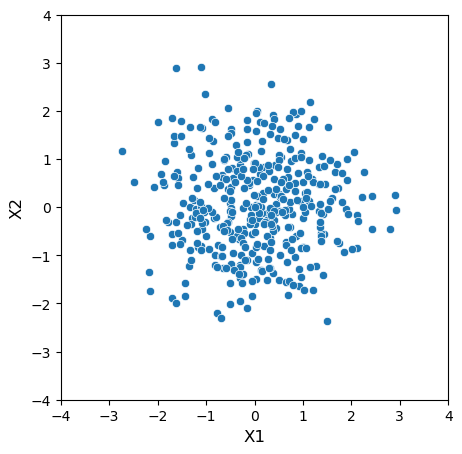

In [22]:
fig, ax = plt.subplots(figsize = ( 5 , 5 )) 
sb.scatterplot( ax = ax , x = x1a , y = x2a , data = xa ) 

ax.set_xlabel( "X1" , size = 12 ) 
ax.set_ylabel( "X2" , size = 12 ) 

ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
 
plt.show() 

Continuing to Dataset B which is based on the uniform distribution

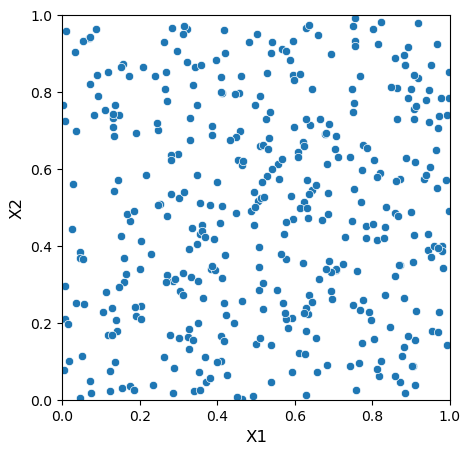

In [23]:
fig, ax = plt.subplots(figsize = ( 5 , 5 )) 
sb.scatterplot( ax = ax , x = x1b , y = x2b , data = xb ) 

ax.set_xlabel( "X1" , size = 12 ) 
ax.set_ylabel( "X2" , size = 12 ) 

ax.set_xlim(0,1)
ax.set_ylim(0,1)
 
plt.show()

Then Dataset C which has the four part structure

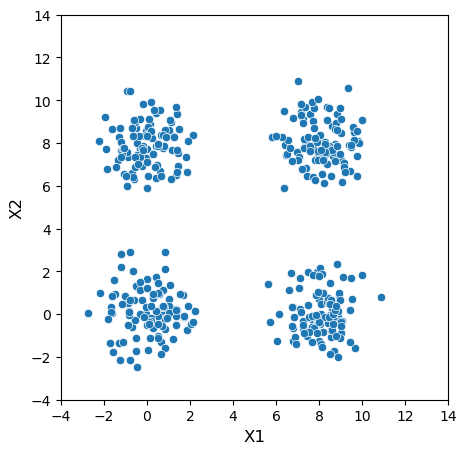

In [24]:
fig, ax = plt.subplots(figsize = ( 5 , 5 )) 
sb.scatterplot( ax = ax , x = xc['X1'] , y = xc['X2'] , data = xc ) 

ax.set_xlabel( "X1" , size = 12 ) 
ax.set_ylabel( "X2" , size = 12 ) 

ax.set_xlim(-4,14)
ax.set_ylim(-4,14)
 
plt.show()

Then Dataset D which has the four part structure, but also has correlation amongst the variables

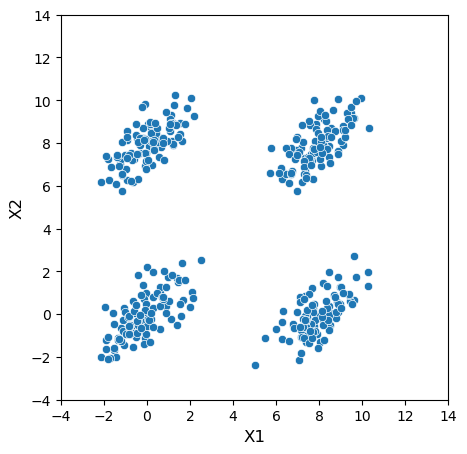

In [25]:
fig, ax = plt.subplots(figsize = ( 5 , 5 )) 
sb.scatterplot( ax = ax , x = xd['X1'] , y = xd['X2'] , data = xd ) 

ax.set_xlabel( "X1" , size = 12 ) 
ax.set_ylabel( "X2" , size = 12 ) 

ax.set_xlim(-4,14)
ax.set_ylim(-4,14)
 
plt.show()

The correlation can be seen clearly, contrasting with the Gaussian sub-clouds in C.

Finally, we wish to plot the 5 variable case. The first code will produce a scatterplot for X1 and X2

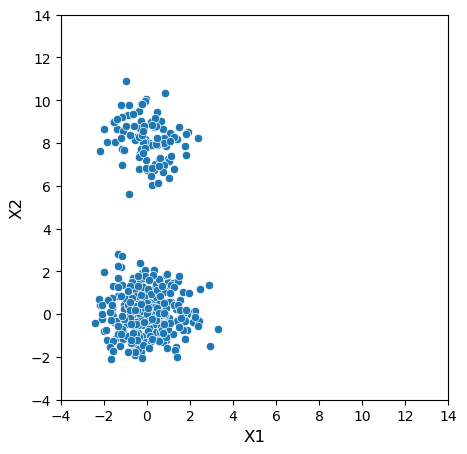

In [26]:
fig, ax = plt.subplots(figsize = ( 5 , 5 )) 
sb.scatterplot( ax = ax , x = xe['X1'] , y = xe['X2'] , data = xe ) 

ax.set_xlabel( "X1" , size = 12 ) 
ax.set_ylabel( "X2" , size = 12 ) 

ax.set_xlim(-4,14)
ax.set_ylim(-4,14)
 
plt.show()

In this plot it appears that there are just two groups, one large and one small. However, we know that this is not the case because there are actually 4 groups. 

Python allows the construction of "pairplots" in Seaborn. This creates a matrix of scatterplots.

/Users/wanlingrudkin/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


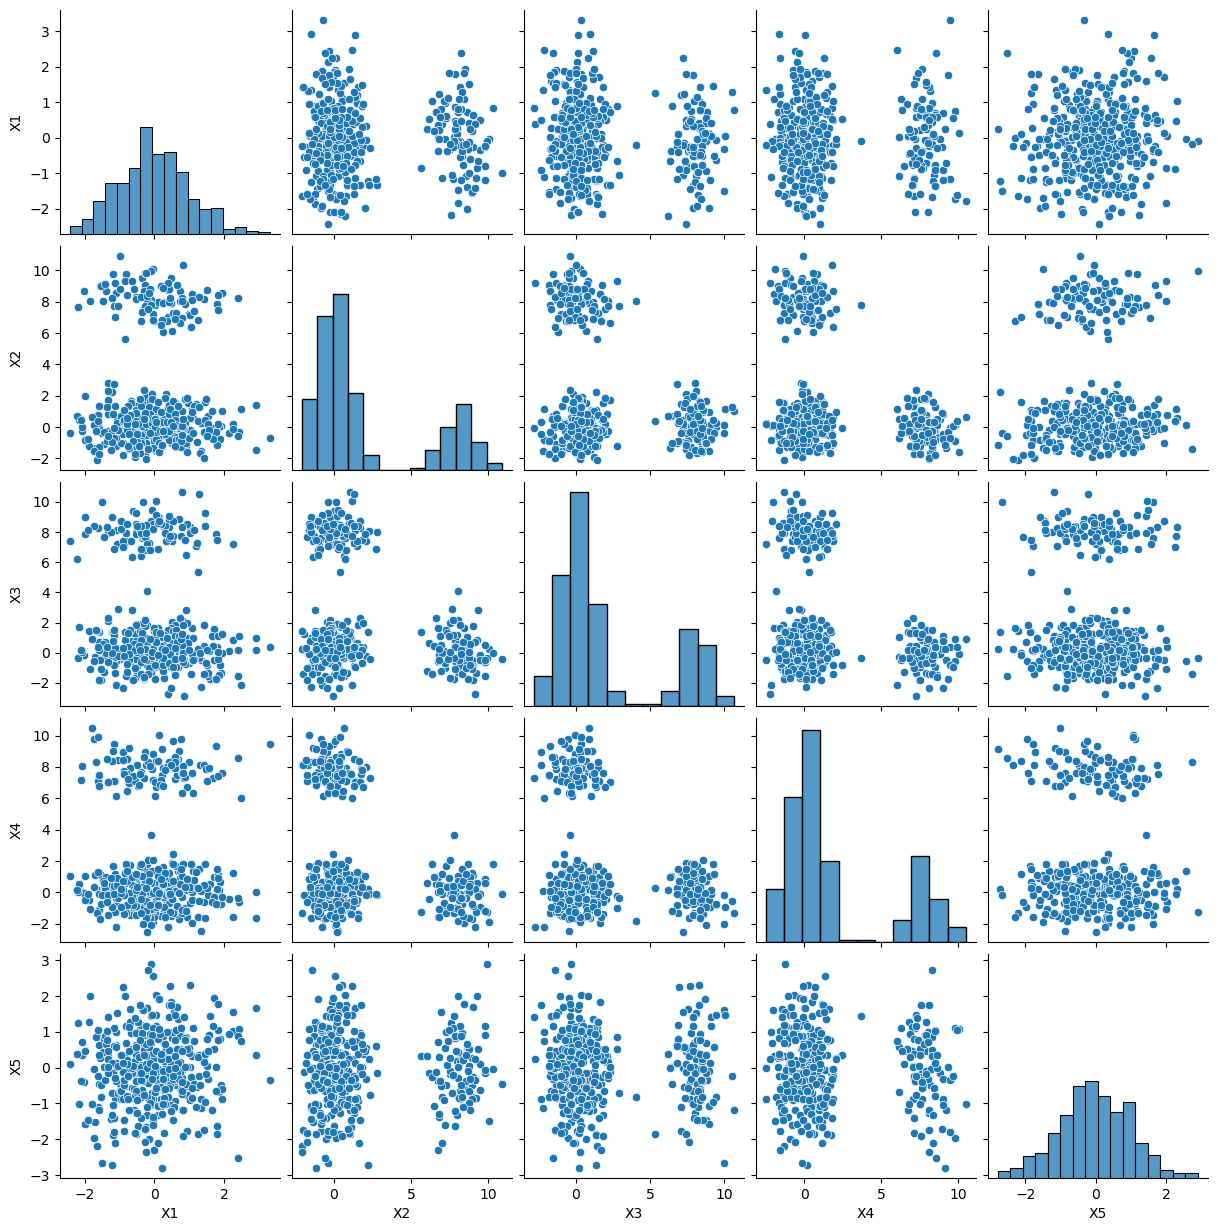

In [27]:
sb.pairplot(xe)

The result shows that no pair demonstrates 4 subclouds. In this way the two-dimensional plotting is not revealing the true structure of the data

Before finishing with the aritificial datasets, we generate a Y variable which is the sum of all of the X values

In [28]:
xa['Y']=xa['X1']+xa['X2']
xb['Y']=xb['X1']+xb['X2']
xc['Y']=xc['X1']+xc['X2']
xd['Y']=xd['X1']+xd['X2']
xe['Y']=xe['X1']+xe['X2']+xe['X3']+xe['X4']+xe['X5']

# Summary Statistics

In [29]:
df2 = xd[['X1','X2','Y']]

We prepare a blank dataframe to store the summary statistics

In [30]:
sdep = pd.DataFrame(columns=['Var', 'Mean', 'SD','Min','q25','q50','q75','Max'], index=range(df2.shape[1]))

To generate the summary statistics a further user defined function is added

In [31]:
for i in range(df2.shape[1]):
  sdep.loc[i,'Var'] = df2.columns[i]
  sdep.loc[i,'Mean'] = round(np.mean(df2.iloc[:,i]),3)
  sdep.loc[i,'SD'] = round(statistics.stdev(df2.iloc[:,i]),3)
  sdep.loc[i,'Min'] = round(min(df2.iloc[:,i]),3)
  sdep.loc[i,'q25'] = round(np.quantile(df2.iloc[:,i],0.25),3)
  sdep.loc[i,'q50'] = round(np.quantile(df2.iloc[:,i],0.50),3)
  sdep.loc[i,'q75'] = round(np.quantile(df2.iloc[:,i],0.75),3)
  sdep.loc[i,'Max'] = round(max(df2.iloc[:,i]),3)


sdep.head()

,Var,Mean,SD,Min,q25,q50,q75,Max
0,X1,3.926,4.097,-2.141,-0.07,3.761,7.795,10.325
1,X2,3.951,4.121,-2.358,-0.122,4.243,7.94,10.241
2,Y,7.877,5.928,-4.156,4.044,7.944,12.336,20.055


To apply the function to other datasets we can simply redefine df2. Of most interest will be E

In [33]:
df2 = xe[['X1','X2','X3','X4','X5','Y']]

Then produce the summary statistics

In [34]:
for i in range(df2.shape[1]):
  sdep.loc[i,'Var'] = df2.columns[i]
  sdep.loc[i,'Mean'] = round(np.mean(df2.iloc[:,i]),3)
  sdep.loc[i,'SD'] = round(statistics.stdev(df2.iloc[:,i]),3)
  sdep.loc[i,'Min'] = round(min(df2.iloc[:,i]),3)
  sdep.loc[i,'q25'] = round(np.quantile(df2.iloc[:,i],0.25),3)
  sdep.loc[i,'q50'] = round(np.quantile(df2.iloc[:,i],0.50),3)
  sdep.loc[i,'q75'] = round(np.quantile(df2.iloc[:,i],0.75),3)
  sdep.loc[i,'Max'] = round(max(df2.iloc[:,i]),3)


sdep

,Var,Mean,SD,Min,q25,q50,q75,Max
0,X1,-0.017,1.012,-2.423,-0.705,-0.071,0.608,3.307
1,X2,2.05,3.654,-2.086,-0.375,0.367,3.511,10.904
2,X3,2.082,3.609,-2.846,-0.371,0.438,4.402,10.652
3,X4,1.975,3.556,-2.511,-0.408,0.491,4.246,10.486
4,X5,-0.029,1.008,-2.787,-0.673,-0.024,0.687,2.895
5,Y,6.06,3.984,-5.812,3.763,6.996,8.925,12.915


For the correlation matrices, the basic Python command works

In [35]:
 Corr_Matrix = round(xd.corr(),3)
print(Corr_Matrix)

       X1     X2      Y
X1  1.000  0.041  0.719
X2  0.041  1.000  0.723
Y   0.719  0.723  1.000


It can be seen that there is no correlation, despite the presence of correlation in the desing. This is an example of Simpsons Paradox. Then extending to the 5 part case.

In [36]:
Corr_Matrix = round(xe.corr(),3)
print(Corr_Matrix)

       X1     X2     X3     X4     X5      Y
X1  1.000  0.003 -0.112  0.010  0.076  0.183
X2  0.003  1.000 -0.295 -0.324  0.020  0.367
X3 -0.112 -0.295  1.000 -0.326 -0.009  0.314
X4  0.010 -0.324 -0.326  1.000 -0.019  0.297
X5  0.076  0.020 -0.009 -0.019  1.000  0.266
Y   0.183  0.367  0.314  0.297  0.266  1.000


Here there are suggested correlations between variables, although we know that each of the sub-clouds has no correlation structure at all.

# TDABM

The final part of the work before the break present the artificial dataset TDABM plots. We will pick up the structure of these commands after the break. The first step is identifying the axes (adf) and the coloration (cdf) as dataframes

In [37]:
xa.reset_index(inplace=True, drop=True)

cdf = pd.DataFrame(xa['Y'])
adf = pd.DataFrame(xa[['X2','X1']])

Then we can generate the Ball Mapper plot

In [38]:
bm1=pbm.BallMapper(X=adf, coloring_df=cdf, eps=1)

Note that Python will not generate the plot, but has created a BallMapper object as bm1. To see the plot we need to invoke the plotting function from the package networkx. 

<Axes: >

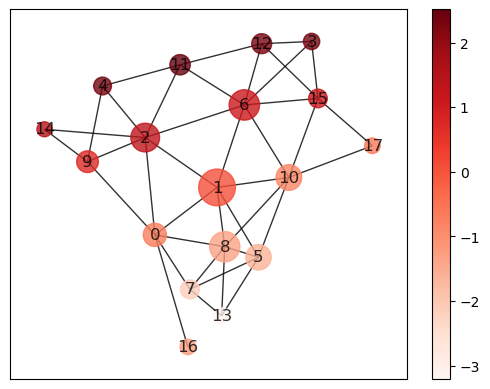

In [39]:
bm1.draw_networkx(coloring_variable='Y', colorbar=True)


We can repeat the code for dataset B. Because B is uniform a radius of 1 will be too large so a smaller radius is chosen.

<Axes: >

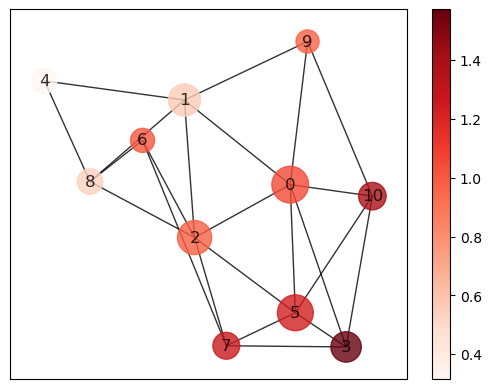

In [42]:
xb.reset_index(inplace=True, drop=True)

cdf = pd.DataFrame(xb['Y'])
adf = pd.DataFrame(xb[['X2','X1']])

bm1=pbm.BallMapper(X=adf, coloring_df=cdf, eps=0.3)

bm1.draw_networkx(coloring_variable='Y', colorbar=True)


Finally let us plot dataset E. Here a larger radius is needed because there are 5 variables to cover. In the code below the radius is set as 3.

<Axes: >

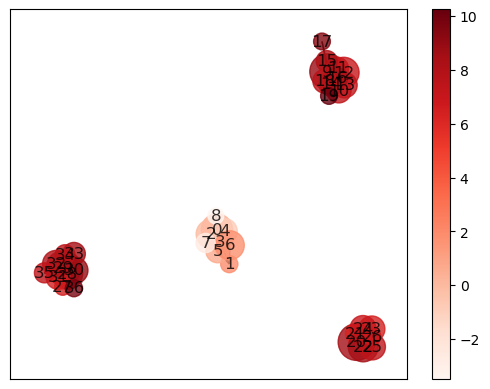

In [44]:
xe.reset_index(inplace=True, drop=True)

cdf = pd.DataFrame(xe['Y'])
adf = pd.DataFrame(xe[['X1','X2','X3','X4','X5']])

bm1=pbm.BallMapper(X=adf, coloring_df=cdf, eps=3)

bm1.draw_networkx(coloring_variable='Y', colorbar=True)

The four group structure is very clear in this plot. There are many ways that we would look to improve the plot. We will look at ways to produce better looking TDABM plots as part of the second half. 